<a href="https://colab.research.google.com/github/nikitasiswadi/capstone-project-segarin/blob/machine-learning/TRIAL_KUBIS_FIX_BANGET_ASLI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INSTALL TENSORFLOW

In [2]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## LOAD DATASET

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
train_segar = '/content/drive/MyDrive/dataset-segarin/Kubis/Training /Segar'
train_busuk = '/content/drive/MyDrive/dataset-segarin/Kubis/Training /Busuk'
test_segar = '/content/drive/MyDrive/dataset-segarin/Kubis/Test/Segar'
test_busuk = '/content/drive/MyDrive/dataset-segarin/Kubis/Test/Busuk'

In [4]:
import os
train_segar_names = os.listdir(train_segar)
train_busuk_names = os.listdir(train_busuk)
test_segar_names = os.listdir(test_segar)
test_busuk_names = os.listdir(test_busuk)

In [5]:
print(len(train_segar_names))
print(len(train_busuk_names))
print(len(test_segar_names))
print(len(test_busuk_names))

495
377
20
21


## BUILDING THE MODEL

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [7]:
base_model = InceptionV3(input_shape=(256,256,3), include_top = False)

87910968/87910968 [==============================] - 0s 0us/step


In [9]:
for layer in base_model.layers:
  layer.trainable = False

In [10]:
x = Flatten()(base_model.output)
x = Dense(units=2, activation='sigmoid')(x)

#Final model
model = Model(base_model.input, x)
model.compile(optimizer= 'adam', loss = tensorflow.keras.losses.binary_crossentropy, metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

## PREPROCESSING DATASET

In [14]:
train_datagen = ImageDataGenerator(featurewise_center=True,
                                   rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_data = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset-segarin/Kubis/Training ', 
                                               class_mode='categorical',
                                               target_size=(256,256), 
                                               batch_size=32)

Found 841 images belonging to 2 classes.


In [15]:
train_data.class_indices

{'Busuk': 0, 'Segar': 1}

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset-segarin/Kubis/Test',
                                                 class_mode = 'categorical',
                                                 target_size=(256,256), 
                                                 batch_size=32)

Found 37 images belonging to 2 classes.


In [18]:
test_data.class_indices

{'Busuk': 0, 'Segar': 1}

In [19]:
#visualizing the data
t_img, label = train_data.next()
t_img

t_img, label = test_data.next()
t_img

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


array([[[[0.70980394, 0.6745098 , 0.54509807],
         [0.6862745 , 0.6509804 , 0.5294118 ],
         [0.6862745 , 0.64705884, 0.50980395],
         ...,
         [0.54901963, 0.14509805, 0.21960786],
         [0.5647059 , 0.14901961, 0.227451  ],
         [0.57254905, 0.14901961, 0.2392157 ]],

        [[0.72156864, 0.69803923, 0.57254905],
         [0.6901961 , 0.6666667 , 0.5411765 ],
         [0.6745098 , 0.6431373 , 0.49803925],
         ...,
         [0.58431375, 0.16470589, 0.23529413],
         [0.5882353 , 0.16470589, 0.25490198],
         [0.5803922 , 0.15294118, 0.227451  ]],

        [[0.70980394, 0.6901961 , 0.5647059 ],
         [0.6901961 , 0.6666667 , 0.5411765 ],
         [0.68235296, 0.6509804 , 0.50980395],
         ...,
         [0.5882353 , 0.16078432, 0.23529413],
         [0.5764706 , 0.14901961, 0.2392157 ],
         [0.5921569 , 0.15686275, 0.23137257]],

        ...,

        [[0.43921572, 0.36862746, 0.18039216],
         [0.42352945, 0.35686275, 0.1764706 ]

In [20]:
t_img.shape

(32, 256, 256, 3)

In [ ]:
def plotImages(img_arr, label):
  for idx , img in enumerate(img_arr):
    if idx <= 10 :
      plt.figure(figsize= (5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis = False
      plt.show()

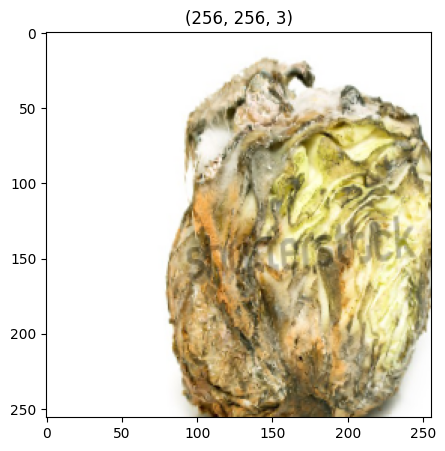

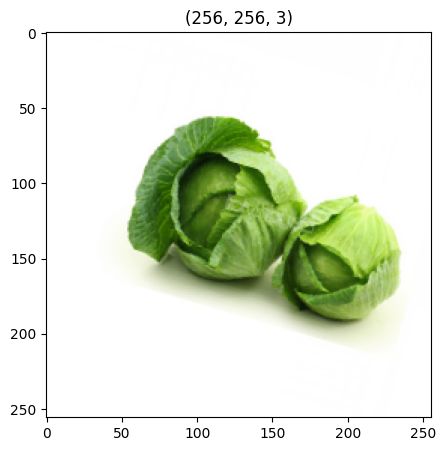

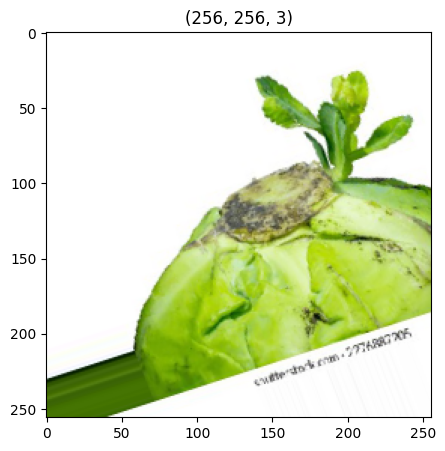

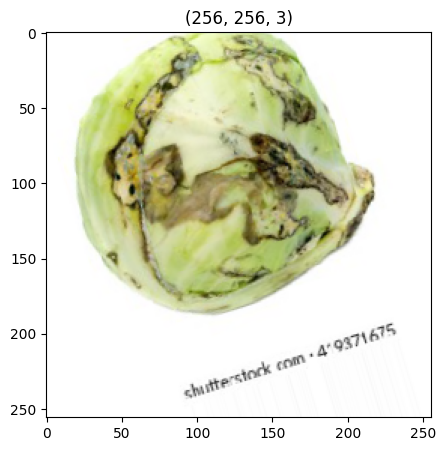

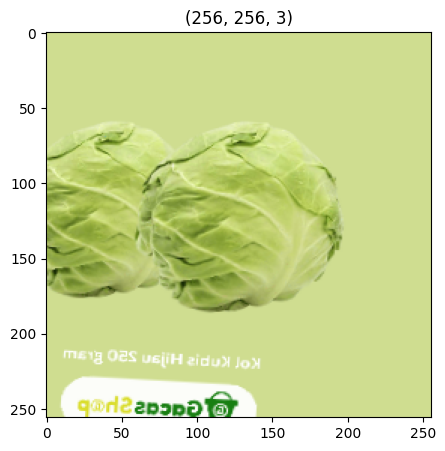

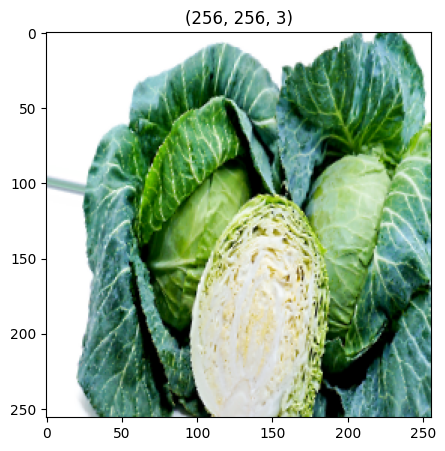

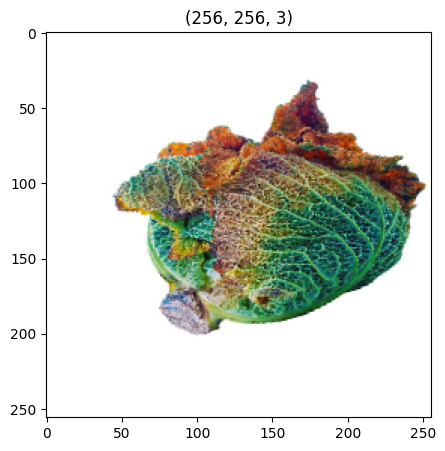

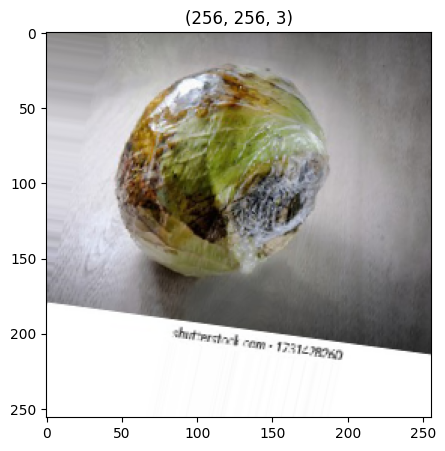

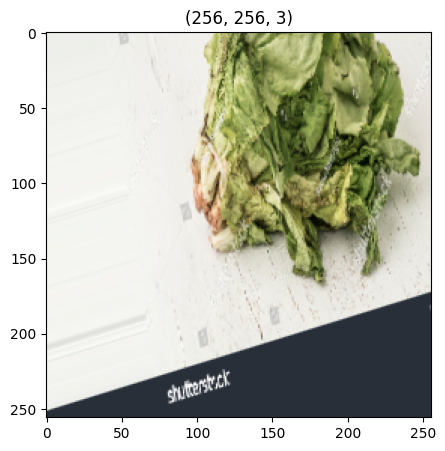

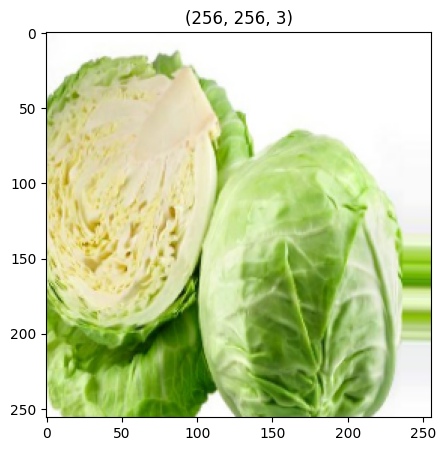

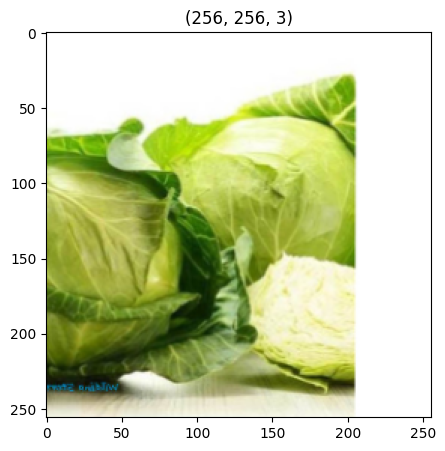

In [ ]:
plotImages(t_img , label)

## CALLBACK AND TRAINING THE MODEL

In [21]:
from tensorflow.keras.callbacks import Callback

#creates a custom callback class
class CustomCallback(Callback):
    """
    This callback will stop the model from training once the model reaches 95% accuracy on the training data
    """
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.95:
            print('Accuracy above 95% -- Stopping Training')
            self.model.stop_training = True #stops model training

callbacks = CustomCallback()

history = model.fit_generator(train_data,
                         validation_data = test_data,
                         steps_per_epoch= 10,
                         epochs=50,
                         verbose = 1,
                         callbacks= [callbacks])

<ipython-input-21-37825419a70b>:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data,
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/50
10/10 [==============================] - 136s 13s/step - loss: 1.5369 - accuracy: 0.7188 - val_loss: 0.7753 - val_accuracy: 0.8378
Epoch 2/50
10/10 [==============================] - 93s 9s/step - loss: 1.5384 - accuracy: 0.8250 - val_loss: 0.7547 - val_accuracy: 0.9189
Epoch 3/50
10/10 [==============================] - 82s 8s/step - loss: 0.5623 - accuracy: 0.8719 - val_loss: 0.8088 - val_accuracy: 0.8919
Epoch 4/50
10/10 [==============================] - 76s 8s/step - loss: 0.4911 - accuracy: 0.8969 - val_loss: 0.7630 - val_accuracy: 0.8378
Epoch 5/50
10/10 [==============================] - 80s 8s/step - loss: 0.4342 - accuracy: 0.9062 - val_loss: 0.9928 - val_accuracy: 0.8108
Epoch 6/50
10/10 [==============================] - 74s 7s/step - loss: 0.2830 - accuracy: 0.9375 - val_loss: 0.6725 - val_accuracy: 0.8378
Epoch 7/50
10/10 [==============================] - 84s 8s/step - loss: 0.3120 - accuracy: 0.9250 - val_loss: 0.4687 - val_accuracy: 0.8919
Epoch 8/50
10/10 [

In [23]:
h = history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Training and validation loss')

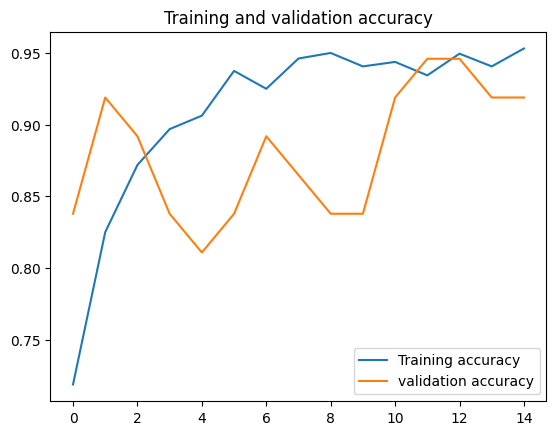

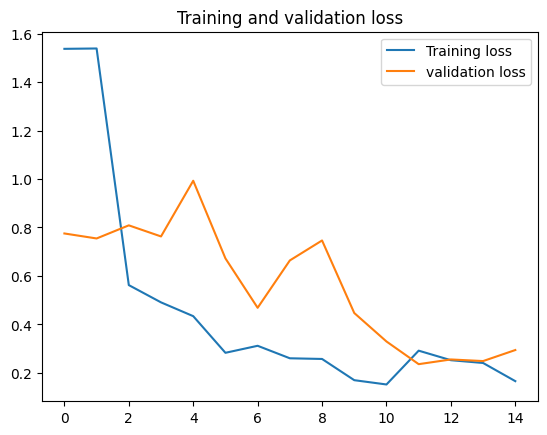

In [24]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc,label="Training accuracy")
plt.plot(epochs, val_acc,label="validation accuracy")
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss,label="Training loss")
plt.plot(epochs, val_loss,label="validation loss")
plt.legend()
plt.title('Training and validation loss')

## TESTING THE MODEL

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

In [33]:
import numpy as np
from google.colab import files
#from keras.preprocessing import image
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(256, 256))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
  output_class= np.argmax(classes)
  classname = ['Busuk', 'Segar']
  print("The predicted class is", classname[output_class])

Saving download (6).jpg to download (6).jpg
1/1 [==============================] - 0s 316ms/step
download (6).jpg
[[0.00154359 0.99992174]]
The predicted class is Segar


## SAVING THE MODEL

In [34]:
model.save('model_segarin_kubis_FIX.h5')